In [47]:
function sir_ode2(du,u,p,t)
    S,I,R = u
    b,g = p
    du[1] = -b*S*I
    du[2] = b*S*I-g*I
    du[3] = g*I
end
parms = [0.1,0.05]
init = [0.99,0.01,0.0]
tspan = (0.0,200.0)
sir_prob2 = ODEProblem(sir_ode2,init,tspan,parms)
sir_sol = solve(sir_prob2,saveat = 0.1)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Vector{Float64}:
   0.0
   0.1
   0.2
   0.3
   0.4
   0.5
   0.6
   0.7
   0.8
   0.9
   ⋮
 199.2
 199.3
 199.4
 199.5
 199.6
 199.7
 199.8
 199.9
 200.0
u: 2001-element Vector{Vector{Float64}}:
 [0.99, 0.01, 0.0]
 [0.9899007620439206, 0.01004911526404097, 5.012269203835053e-5]
 [0.9898010467485492, 0.010098461713420163, 0.00010049153803066705]
 [0.9897008519670815, 0.010148040336446743, 0.00015110769647183207]
 [0.989600175544873, 0.01019785212459509, 0.00020197233053187715]
 [0.9894990153190228, 0.010247898072564106, 0.0002530866084130026]
 [0.9893973691183536, 0.010298179178280388, 0.00030445170336601107]
 [0.9892952347634115, 0.01034869644289822, 0.0003560687936903061]
 [0.9891926100664665, 0.010399450870799583, 0.00040793906273389383]
 [0.9890894928315125, 0.01045044346959414, 0.00046006369889337886]
 ⋮
 [0.2100860498388935, 0.014812841365666572, 0.7751011087954401]
 [0.21005497749129043, 0.014769956774020545, 0.775

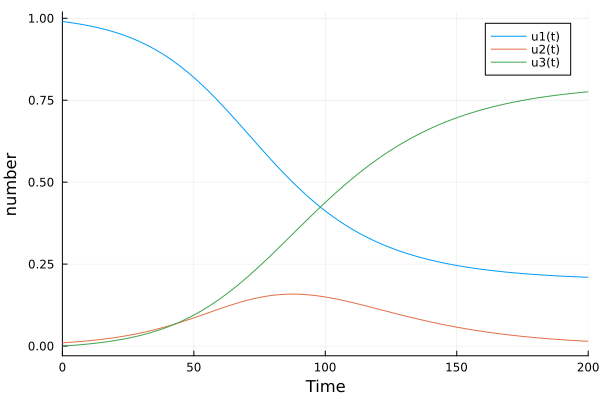

In [48]:
plot(sir_sol, xlabel= "Time", ylabel= "number")

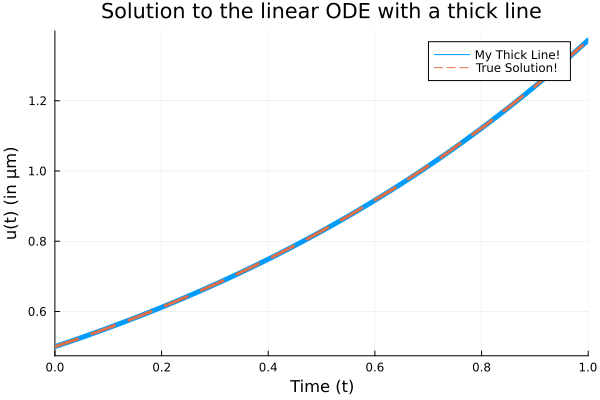

In [5]:
using DifferentialEquations
f(u,p,t) = 1.01*u
u0 = 1/2
tspan = (0.0,1.0)
prob = ODEProblem(f,u0,tspan)
sol = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)

using Plots
plot(sol,linewidth=5,title="Solution to the linear ODE with a thick line",
     xaxis="Time (t)",yaxis="u(t) (in μm)",label="My Thick Line!") # legend=false
plot!(sol.t, t->0.5*exp(1.01t),lw=3,ls=:dash,label="True Solution!")

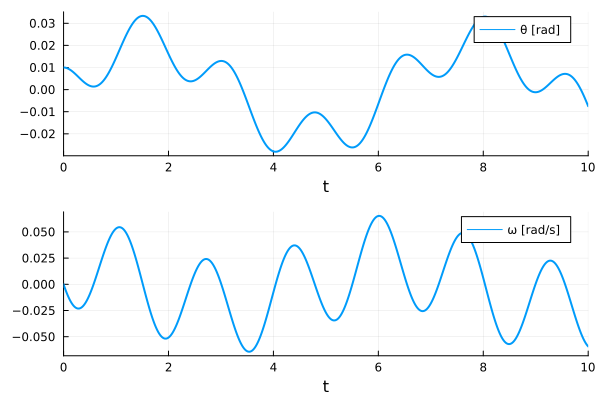

In [17]:
using DifferentialEquations
using Plots

l = 1.0                             # length [m]
m = 1.0                             # mass [kg]
g = 9.81                            # gravitational acceleration [m/s²]

function pendulum!(du,u,p,t)
    du[1] = u[2]                    # θ'(t) = ω(t)
    du[2] = -3g/(2l)*sin(u[1]) + 3/(m*l^2)*p(t) # ω'(t) = -3g/(2l) sin θ(t) + 3/(ml^2)M(t)
end

θ₀ = 0.01                           # initial angular deflection [rad]
ω₀ = 0.0                            # initial angular velocity [rad/s]
u₀ = [θ₀, ω₀]                       # initial state vector
tspan = (0.0,10.0)                  # time interval

M = t->0.1sin(t)                    # external torque [Nm]

prob = ODEProblem(pendulum!,u₀,tspan,M)
sol = solve(prob)

plot(sol,linewidth=2,xaxis="t",label=["θ [rad]" "ω [rad/s]"],layout=(2,1))

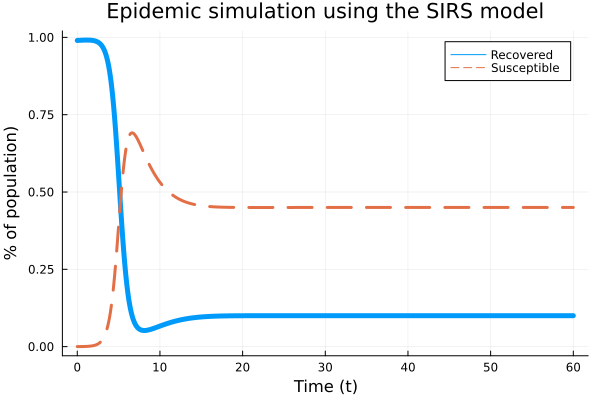

In [21]:
function sirs(; beta, gamma, delta)
    function f!(du,u,p,t)
        du[1] = gamma * (1 - u[1] - u[2]) - beta * u[1] * u[2]
        du[2] = beta * u[1] * u[2] - gamma * u[2]
    end

    u0 = [0.99; 0.0001]
    tspan = (0.0,60.0)
    prob = ODEProblem(f!,u0,tspan)
    u = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)   # Fifth order Tsitouras method
    u0 = [ elem[1] for elem in u.u]
    u1 = [ elem[2] for elem in u.u]

    plot(u.t, u0,linewidth=5,title="Epidemic simulation using the SIRS model",
         xaxis="Time (t)",yaxis="% of population)",label="Recovered") # legend=false
    plot!(u.t, u1,lw=3,ls=:dash,label="Susceptible")
end

sirs( beta = 2.0, gamma = 0.2, delta = 0.1)

In [27]:
gamma_val = 0.2
r0_val = 0.0001

function sir(;s0,  beta, gamma, r0)
    f(r,p,t) = gamma * (1 - r - s0 * exp(-beta * r / gamma))

    tspan = (0.0,60.0)
    prob = ODEProblem(f,r0,tspan)
    r = solve(prob, Tsit5(), reltol=1e-8, abstol=1e-8)   # Fifth order Tsitouras method
    s = s0 * exp.( -beta .* r ./ gamma)
    x = 1 .- s .- r
    return(x, r.t)
    
end



sir (generic function with 1 method)

In [28]:
x,t = sir(s0 = 0.99, beta = 0.5, gamma = gamma_val, r0 = r0_val)
plot(t, x,linewidth=5,title="Epidemic simulation using the SIR model", linecolor="steelblue",
        xaxis="Time (t)",yaxis="% of population that is infected",label="Baseline of beta = 0.5") # legend=false

count = 0.1
for i in 1.0: 0.5 :3.0
    x,t = sir(s0 = 0.99, beta = i, gamma = gamma_val, r0 = r0_val)
    #print(t)
    a = plot!(t, x,lw=3,label=i, linecolor=cgrad(g)[count]) # legend=false
    count += 0.1
end
display(a)

MethodError: MethodError: no method matching similar(::Float64, ::Type{Float64})
Closest candidates are:
  similar(!Matched::Union{LinearAlgebra.Adjoint{T, var"#s885"}, LinearAlgebra.Transpose{T, var"#s885"}} where {T, var"#s885"<:(AbstractVector)}, ::Type{T}) where T at C:\Users\olarinoyem\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:207
  similar(!Matched::Union{LinearAlgebra.Adjoint{T, S}, LinearAlgebra.Transpose{T, S}} where {T, S}, ::Type{T}) where T at C:\Users\olarinoyem\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:211
  similar(!Matched::Union{LinearAlgebra.Adjoint{T, S}, LinearAlgebra.Transpose{T, S}} where {T, S}, ::Type{T}, !Matched::Tuple{Vararg{Int64, N}}) where {T, N} at C:\Users\olarinoyem\AppData\Local\Programs\Julia-1.8.2\share\julia\stdlib\v1.8\LinearAlgebra\src\adjtrans.jl:212
  ...

In [26]:
# Estimates for gamma and beta for COVID obtained from https://arxiv.org/pdf/2002.06563.pdf
# Epidemic analysis of COVID-19 in China by dynamical modeling
# Liangrong Peng, Wuyue Yang, Dongyan Zhang, Changjing Zhuge, Liu Hong
# medRxiv 2020.02.16.20023465; doi: https://doi.org/10.1101/2020.02.16.20023465
# Estimate for gamma for flu was not available

beta_val(;R0, gamma) = R0 * gamma
cv = beta_val(R0 = 2.2, gamma = 0.5) 
fl = beta_val(R0 = 1.3, gamma = 0.5)

sir(s0 = 0.99, beta = cv, gamma = 0.5, r0 = 0.0001, title="Coronavirus - SIR simulation with estimated parameters")

UndefKeywordError: UndefKeywordError: keyword argument delta not assigned

In [33]:
using Optim

# c is the mean degree of the random network
c_baseline = 1.5
c_end = 4.0

# Newton's solve 
function solve_S(;c,phi)
    f(S) = 1 - exp(-phi*c*S) - S# Function
    df(S) = c * phi * exp(-phi * c * S) - 1

    S_iter = 0.5
    for i in 1 : 300
        delS = -f(S_iter) / df(S_iter)
        S_iter += delS 
    end
    
    return(S_iter)
end

r = [ solve_S(c = c_baseline, phi = i) for i in 0:0.01:1]
plot([0: 0.01: 1], r,linewidth=5,title="Outbreak size for varying 'mean degree' of the network", linecolor="steelblue",
         xaxis="Phi or the transmission probability",yaxis="% of population that is infected",label="Baseline of c = 1.5") # legend=false

count = 0.1
for c in c_baseline + 0.5: 0.5: c_end
    r = [ solve_S(c = c, phi = i) for i in 0 : 0.01 : 1]
    a = plot!([0: 0.01: 1], r, lw=3, label=c, linecolor=cgrad(g)[count]) # legend=false
    count += 0.1
end


In [36]:
function lorenz(u,p,t)
    dx = 10.0*(u[2]-u[1])
    dy = u[1]*(28.0-u[3]) - u[2]
    dz = u[1]*u[2] - (8/3)*u[3]
    [dx,dy,dz]
   end

lorenz (generic function with 1 method)

In [39]:
using DifferentialEquations, BenchmarkTools
u0 = [1.0;0.0;0.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz,u0,tspan)
@benchmark solve(prob,Tsit5())

BenchmarkTools.Trial: 254 samples with 1 evaluation.
 Range (min … max):   3.346 ms … 634.409 ms  ┊ GC (min … max):  0.00% … 96.23%
 Time  (median):     10.694 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   19.007 ms ±  50.261 ms  ┊ GC (mean ± σ):  22.46% ± 13.72%

  ▇█▆▇▆▅▃▂                                                      
  ████████▆▄▇▆▇▇▁▄▁▁▄▁▆▁▁▁▁▁▁▁▄▁▁▁▁▄▁▁▁▁▄▁▁▁▁▁▄▁▁▁▁▁▁▁▁▄▁▁▁▁▁▄ ▆
  3.35 ms       Histogram: log(frequency) by time       141 ms <

 Memory estimate: 7.82 MiB, allocs estimate: 101102.

In [38]:
import Pkg
Pkg.add("BenchmarkTools")

   Resolving package versions...


   Installed BenchmarkTools ─ v1.3.1


    Updating `C:\Users\olarinoyem\.julia\environments\v1.8\Project.toml`
  [6e4b80f9] + BenchmarkTools v1.3.1
    Updating `C:\Users\olarinoyem\.julia\environments\v1.8\Manifest.toml`

  [6e4b80f9] + BenchmarkTools v1.3.1
  [9abbd945] + Profile


Precompiling

project...

  ✓ BenchmarkTools
  1 dependency successfully precompiled in 13 seconds. 363 already precompiled.
